# Dataset Cleaning
*(This notebook was inspired by Anton T. Ruberts' Dataset Cleaning notebook.)*
The dataset came from the [Coffee Shop Sales](https://mavenanalytics.io/data-playground) from MavenAnalytics.

The main objectives of this notebook are:
- Observe the contents of the dataset,
- handle missing, duplicate, incorrect, or outlier values, and
- export the cleaned data.

In [2]:
import pandas as pd

## Loading the dataset

In [17]:
data = pd.read_csv('../data/coffee.csv')
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,1,1/1/2023,7:06:11,5,Lower Manhattan,32,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6
1,2,1/1/2023,7:08:56,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6
2,3,1/1/2023,7:14:04,5,Lower Manhattan,59,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6
3,4,1/1/2023,7:20:24,5,Lower Manhattan,22,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6
4,5,1/1/2023,7:22:41,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6


## Initial exploration of the data

In [18]:
print("Dataset information:")
data.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16 

In [9]:
data_summary = data.describe()
num_cols = ['transaction_qty', 'unit_price', 'Total_Bill']
data_summary = data_summary[num_cols]
data_summary

,transaction_qty,unit_price,Total_Bill
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


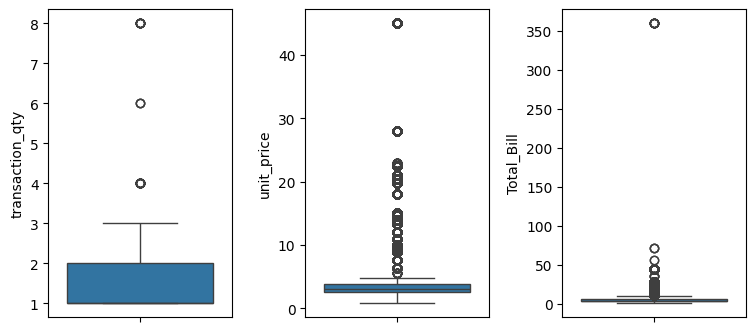

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(9, 4))
for i, num_col in enumerate(num_cols):
    sns.boxplot(y=data[num_col], ax=axes[i])

fig.subplots_adjust(wspace=0.4)

**Observations**
- The only quantitative columns in the dataset are: `transaction_qty`, `unit_price`, and `Total_Bill`.
- Among the abovementioned, all three columns have an outlier. A notable observation is that the maximum value in the `Total_Bill` column appears to be influenced by both the maximum values of`transaction_qty` and `unit_price` variables.

**Actions(s)**
- We can remove the `product_id` and `store_id` since `product_type` and `store_location` are much simpler entries. The same goes for droppable time columns `Month` and `Day of Week`, which have better counterparts in `Month Name` and `Day Name`.
- `transaction_id` is not relevant because there are no merges to be performed, thus can be dropped.


In [24]:
duplicate = data[data.duplicated()]
duplicate

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week


In [7]:
data.drop(['transaction_id', 'transaction_time', 'store_id', 'product_id', 'Month', 'Day of Week'], axis=1, inplace=True)

### Missing Data

In [ ]:
data.isna().sum()

transaction_date    0
store_location      0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
dtype: int64

**Observations**
- Where do the missing data come from? Are there missing entries associated with a category/value of a column?

**Outcome(s)**
- Can the rows be dropped? Why?

## Data Pre-processing Pipeline

For this coffee dataset, we have a clean dataset such that we do not have to apply a pipeline. Nonetheless, I'm leaving this section here to serve as a template for future projects.

In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format="mixed", dayfirst=True)
data.to_csv('../data/coffee_cleaned.csv', index=False)  

In [ ]:
data.head()

,transaction_date,store_location,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour
0,2023-01-01,Lower Manhattan,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7
1,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7
2,2023-01-01,Lower Manhattan,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7
3,2023-01-01,Lower Manhattan,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7
4,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7
